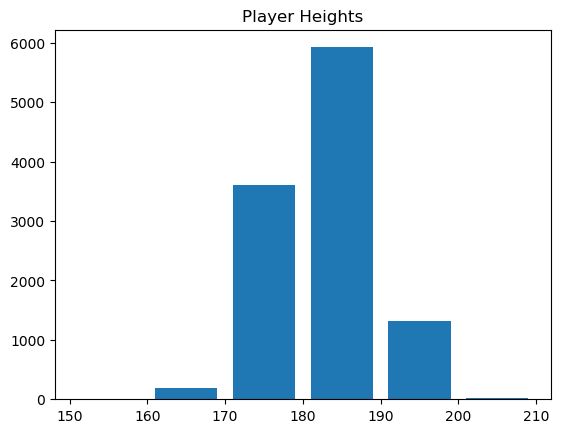

In [67]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

bins = [150, 160, 170, 180, 190, 200, 210
       ]
c.execute("SELECT height FROM Player")

heights = []

for row in c.fetchall():
    heights.append(row)

newh = np.array(heights)

conn.commit
c.close
conn.close

plt.hist(newh, bins = bins, histtype = 'bar', rwidth = 0.8)
plt.title("Player Heights")
plt.show()



<function matplotlib.pyplot.show>

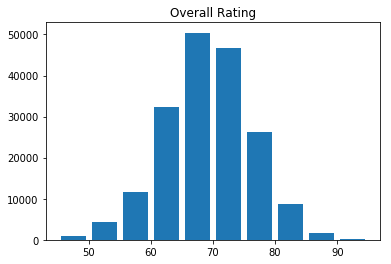

In [2]:
import sqlite3
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

bins = [  45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95
       ]
c.execute('SELECT overall_rating FROM Player_Attributes WHERE overall_rating != "None" ')

ratings = []

for row in c.fetchall():
    ratings.append(row)

newr = np.array(ratings)

plt.hist(newr, bins, histtype = 'bar', rwidth = 0.8)
plt.title("Overall Rating")

conn.commit
c.close
conn.close


plt.show






In [139]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

# def parse_date(date):
#     if date == '':
#         return None
#     else:
#         return dt.strptime(date, '%Y-%m-%d')

conn = sqlite3.connect('database.sqlite')

c = conn.cursor()

thedataframe = pd.read_sql("""SELECT Player.birthday, Player.player_api_id, Player.player_name, 
            Player_Attributes.overall_rating 
        FROM Player, Player_Attributes 
        WHERE Player.player_api_id = Player_Attributes.player_api_id""", conn)

thedataframe = thedataframe.drop_duplicates('player_api_id')

for x in thedataframe:
    x = 1

# for row in thedataframe:
#     row['birthday'] = parse_date(row)
# data = []
# for row in c.fetchall():
#     data.append(row)

# data2 = np.array(data)

conn.commit
c.close
conn.close
print(thedataframe['birthday'][0])


1992-02-29 00:00:00


In [137]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('database.sqlite')
c = conn.cursor()


#c.execute("SELECT * FROM COUNTRY")
datafroo = pd.read_sql("""SELECT League.name, Country.name FROM League, Country WHERE League.country_id = Country.id""", conn)

c.execute("Select * from league")
league = c.fetchall()


c.close
conn.close
print(datafroo)
print(league)


                        name         name
0     Belgium Jupiler League      Belgium
1     England Premier League      England
2             France Ligue 1       France
3      Germany 1. Bundesliga      Germany
4              Italy Serie A        Italy
5     Netherlands Eredivisie  Netherlands
6         Poland Ekstraklasa       Poland
7   Portugal Liga ZON Sagres     Portugal
8    Scotland Premier League     Scotland
9            Spain LIGA BBVA        Spain
10  Switzerland Super League  Switzerland
[(1, 1, 'Belgium Jupiler League'), (1729, 1729, 'England Premier League'), (4769, 4769, 'France Ligue 1'), (7809, 7809, 'Germany 1. Bundesliga'), (10257, 10257, 'Italy Serie A'), (13274, 13274, 'Netherlands Eredivisie'), (15722, 15722, 'Poland Ekstraklasa'), (17642, 17642, 'Portugal Liga ZON Sagres'), (19694, 19694, 'Scotland Premier League'), (21518, 21518, 'Spain LIGA BBVA'), (24558, 24558, 'Switzerland Super League')]


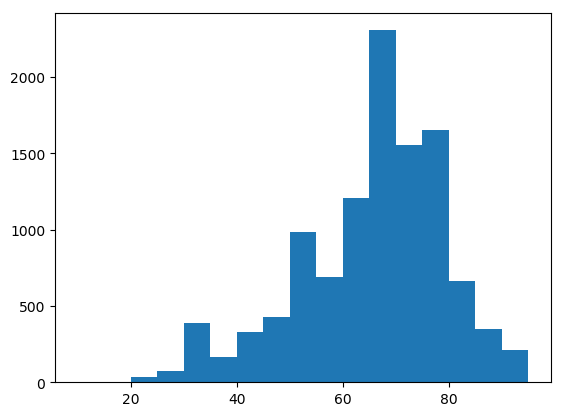

In [131]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

bins = [  10,15,20,25,30,35,40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95 ]

w = pd.read_sql('SELECT player_api_id, sprint_speed FROM Player_attributes', conn)
w = w.drop_duplicates('player_api_id')
plt.hist(w['sprint_speed'], bins, histtype = 'bar')
# print(w)

c.close
conn.close
plt.show()


In [17]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

birthdays = pd.read_sql("SELECT birthday, player_api_id FROM Player", conn)
birthdays['year'] = pd.to_datetime(birthdays['birthday']).dt.year
birthdays['age'] = (dt.today().year)-(birthdays['year'])
birthdays['month'] = pd.to_datetime(birthdays['birthday']).dt.month

bdayavg = birthdays['age'].mean()
bdaystd = birthdays['age'].std()


bins_values = np.arange(start = 16, stop = 40, step = 2)
# t = birthdays['age'].hist(bins = bins_values)

# print(bdaystd)
# print(bdayavg)

speed = pd.read_sql('SELECT sprint_speed, player_api_id FROM Player_attributes', conn)
speed = speed.drop_duplicates('player_api_id')

both = pd.merge(birthdays, speed, on='player_api_id')
mean_age = both['age'].mean()
std_age = both['age'].std()
mean_speed = both['sprint_speed'].mean()
std_speed = both['sprint_speed'].std()
both['age_normalized'] = (both['age'] - mean_age)/std_age
both['speed_normalized'] = (both['sprint_speed'] - mean_speed)/std_speed

corr = np.corrcoef(both['age'], both['sprint_speed'])

print (corr)
# plt.scatter(both['age_normalized'], both['speed_normalized'], 1)
# plt.show

# print(both.head())

c.close
conn.close




[[ 1.         -0.36960125]
 [-0.36960125  1.        ]]


<function Connection.close>

In [7]:
# https://community.modeanalytics.com/python/tutorial/python-histograms-boxplots-and-distributions/
    

In [9]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

match = pd.read_sql('SELECT * FROM Match LIMIT 5', conn)
match2 = pd.read_sql('SELECT home_team_api_id, home_team_goal, away_team_goal FROM Match', conn)


print(match2.groupby('home_team_api_id').sum())
test = np.array(match.columns)    
# print(test)
c.close
conn.close
# print(match2)


                  home_team_goal  away_team_goal
home_team_api_id                                
1601                         148             123
1773                          74              73
1957                         176             123
2033                          70              92
2182                         215              91
2183                          96              68
2186                         144             130
4049                          22              33
4064                          13              19
4087                         105             103
4170                          19              31
6269                          19              27
6351                          15              22
6367                          19              17
6391                          23              32
6403                         166             167
6413                         124              91
6421                          35              40
6433                

<function Connection.close>

In [7]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

match_count = pd.read_sql('SELECT home_team_api_id, match_api_id FROM Match', conn)
goal_count = pd.read_sql('SELECT home_team_api_id, home_team_goal FROM Match', conn)

c.close
conn.close
df = match_count.groupby('home_team_api_id').count()
df.sort_values('match_api_id', ascending = False)

df2 = goal_count.groupby('home_team_api_id').sum()
df2.sort_values('home_team_goal', ascending =False)

df3 = match_count.merge(goal_count, how = "left")
print(df3)
# df['avg_goals'] = 

         home_team_api_id  match_api_id  home_team_goal
0                    9987        492473               1
1                    9987        492473               1
2                    9987        492473               3
3                    9987        492473               1
4                    9987        492473               2
5                    9987        492473               1
6                    9987        492473               1
7                    9987        492473               4
8                    9987        492473               3
9                    9987        492473               1
10                   9987        492473               1
11                   9987        492473               2
12                   9987        492473               0
13                   9987        492473               0
14                   9987        492473               0
15                   9987        492473               2
16                   9987        492473         